In [1]:

import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.express as px
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=90)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

# Collecting the stock price data of H&M using the yfinance API of Yahoo Finance.
data = yf.download(["AAPL", "MSFT"], start=start_date,
                              end=end_date,
                              progress=False) 

print(data.head())  


YF.download() has changed argument auto_adjust default to True
Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2025-01-13  234.142563  416.355164  234.412271  417.662540  229.467710   
2025-01-14  233.023788  414.838226  235.860666  418.900059  232.214681   
2025-01-15  237.608749  425.456909  238.697564  427.293224  234.172525   
2025-01-16  228.009308  423.730347  237.748600  428.630525  227.779565   
2025-01-17  229.727417  428.171478  232.034878  433.610585  228.229064   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2025-01-13  411.464975  233.273523  414.409054  49630700  17604800  
2025-01-14  409.898119  234.492175  416.973928  39435300  16935900  

AAPL


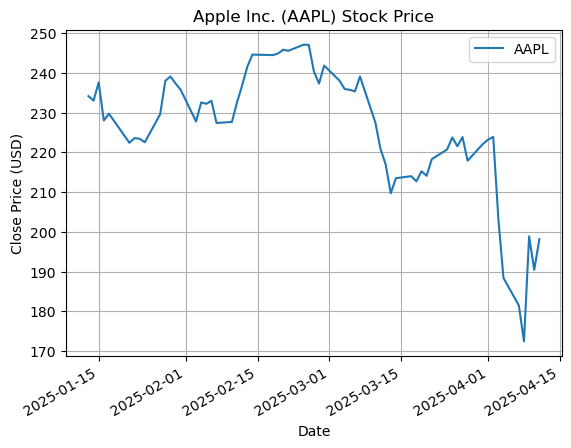

MSFT


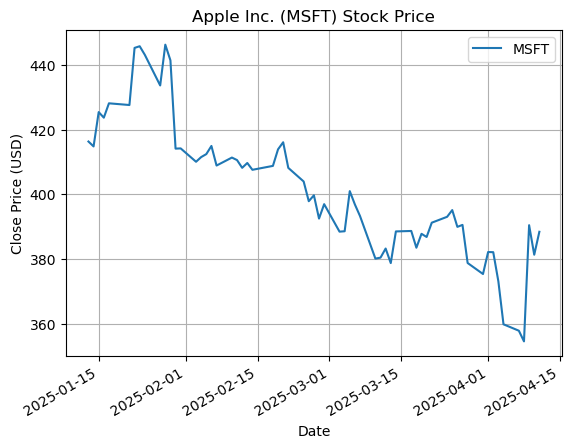

In [ ]:
for i in data['Close'].columns:
    print(i)
    data['Close'][i].plot()
    plt.title(f'Apple Inc. ({i}) Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

n = len(data['Close'].columns)
fig = make_subplots(rows=n, cols=1, shared_xaxes=True, vertical_spacing=0.03,
                    subplot_titles=[f"Inc. ({i}) Stock Price" for i in data['Close'].columns])

for idx, i in enumerate(data['Close'].columns, start=1):
    fig.add_trace(
        go.Scatter(x=data['Close'].index, y=data['Close'][i], mode='lines', name=i),
        row=idx, col=1
    )

fig.update_layout(height=300 * n,  # Adjust height depending on number of plots
                  title_text="Stock Prices",
                  showlegend=False)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Close Price (USD)")

# Save to HTML
fig.write_html("apple_stock_prices.html")
print("Saved to apple_stock_prices.html")

Saved to apple_stock_prices.html


In [4]:
fig.show()

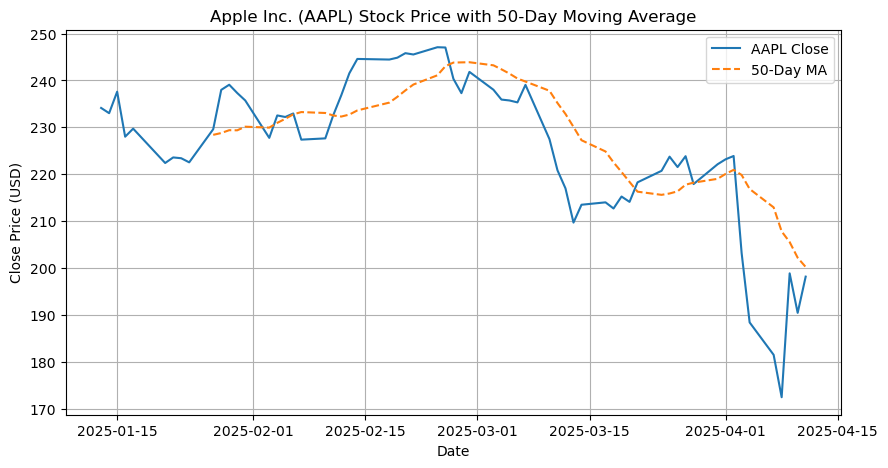

In [24]:
data['50_MA'] = data['Close']['AAPL'].rolling(window=10).mean()

# Plot the closing prices and the moving average
plt.figure(figsize=(10, 5))
plt.plot(data['Close']['AAPL'], label='AAPL Close')
plt.plot(data['50_MA'], label='50-Day MA', linestyle='--')
plt.title('Apple Inc. (AAPL) Stock Price with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()